
# Image denoising using dictionary learning

An example comparing the effect of reconstructing noisy fragments
of a raccoon face image using firstly online `DictionaryLearning` and
various transform methods.

The dictionary is fitted on the distorted left half of the image, and
subsequently used to reconstruct the right half. Note that even better
performance could be achieved by fitting to an undistorted (i.e.
noiseless) image, but here we start from the assumption that it is not
available.

A common practice for evaluating the results of image denoising is by looking
at the difference between the reconstruction and the original image. If the
reconstruction is perfect this will look like Gaussian noise.

It can be seen from the plots that the results of `omp` with two
non-zero coefficients is a bit less biased than when keeping only one
(the edges look less prominent). It is in addition closer from the ground
truth in Frobenius norm.

The result of `least_angle_regression` is much more strongly biased: the
difference is reminiscent of the local intensity value of the original image.

Thresholding is clearly not useful for denoising, but it is here to show that
it can produce a suggestive output with very high speed, and thus be useful
for other tasks such as object classification, where performance is not
necessarily related to visualisation.


## Generate distorted image



In [1]:
import denoising_methods as dm
import numpy as np

try:  # Scipy >= 1.10
    from scipy.datasets import face
except ImportError:
    from scipy.misc import face

Distorting image...


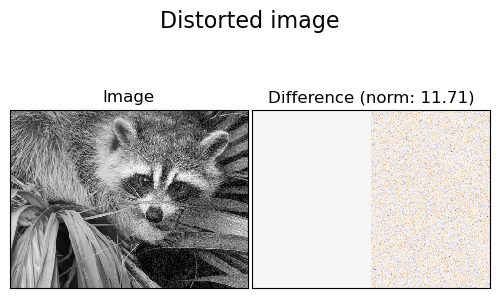

In [2]:
raccoon_face = face(gray=True)

# Convert from uint8 representation with values between 0 and 255 to
# a floating point representation with values between 0 and 1.
raccoon_face = raccoon_face / 255.0

# downsample for higher speed
raccoon_face = (
    raccoon_face[::4, ::4]
    + raccoon_face[1::4, ::4]
    + raccoon_face[::4, 1::4]
    + raccoon_face[1::4, 1::4]
)
raccoon_face /= 4.0
height, width = raccoon_face.shape

# Distort the right half of the image
print("Distorting image...")
distorted = raccoon_face.copy()
distorted[:, width // 2 :] += 0.075 * np.random.randn(height, width // 2)
dm.show_with_diff(distorted, raccoon_face, "Distorted image")

1.0 iterations / 105 steps in 5.06.


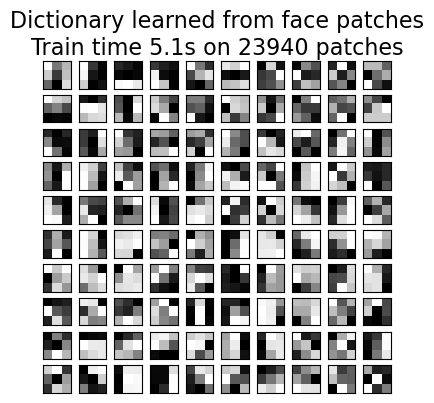

2.0 iterations / 609 steps in 59.55.


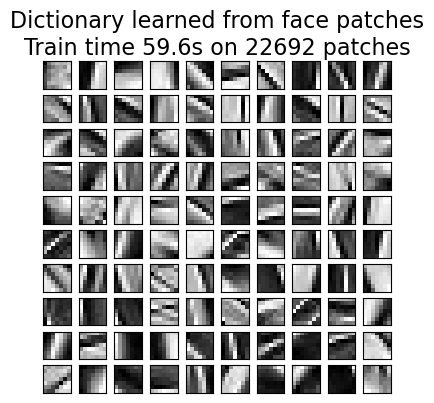

2.0 iterations / 366 steps in 68.74.


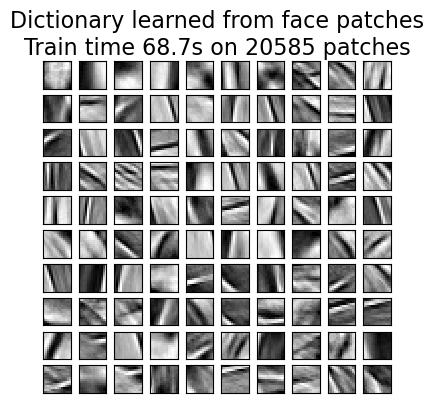

In [3]:
# Precompute dictionaries to spare us repetition
bsize = 64
dico3, V3 = dm.dictionary_builder(3, bsize, distorted)
dico7, V7 = dm.dictionary_builder(7, bsize, distorted)
dico14, V14 = dm.dictionary_builder(14, bsize, distorted)

## Varying Patch Size

### Patch Size = 3

As we can see, we only learn atoms/dictionary entries at the pixel level.  That said, when using such a limited library (of only one atom) this gives rise to surprisingly accurate results.  

omp
1 atom...


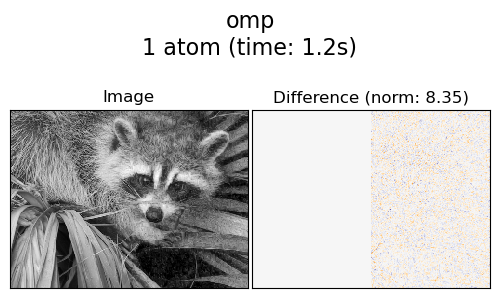

In [5]:
dm.raccoon_learner(dico3, V3, raccoon_face, distorted, 3, 1, 'omp')

### Patch Size = 7

omp
2 atoms...


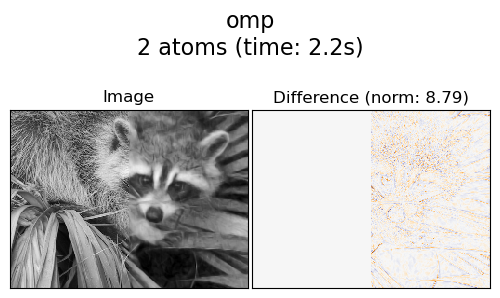

In [6]:
dm.raccoon_learner(dico7, V7, raccoon_face, distorted, 7, 2, 'omp')

### Patch Size = 14

omp
2 atoms...


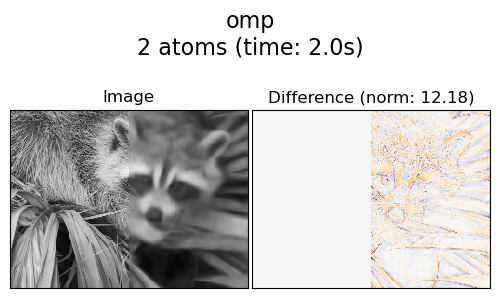

In [8]:
dm.raccoon_learner(dico14, V14, raccoon_face, distorted, 14, 2, 'omp')

## Changing the Number of Atoms

### Patch Size = 3, Number of Atoms = 2

omp
2 atoms...


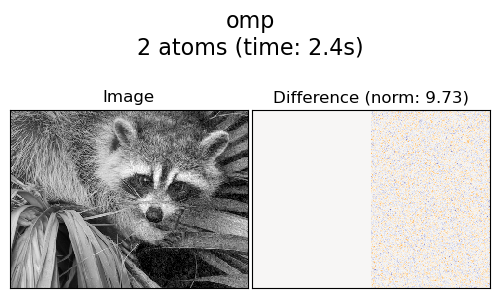

In [9]:
dm.raccoon_learner(dico3, V3, raccoon_face, distorted, 3, 2, 'omp')

### Patch Size = 7, Number of Atoms = 10

omp
10 atoms...


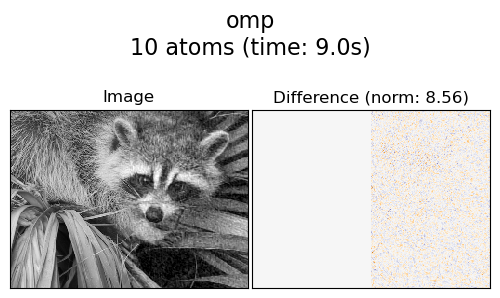

In [10]:
dm.raccoon_learner(dico7, V7, raccoon_face, distorted, 7, 10, 'omp')

### Patch Size = 14, Number of Atoms = 10

omp
10 atoms...


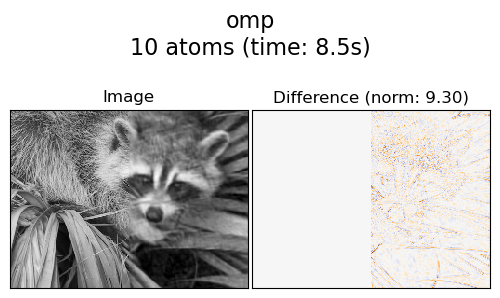

In [11]:
dm.raccoon_learner(dico14, V14, raccoon_face, distorted, 14, 10, 'omp')

### Patch Size = 7, Number of Atoms = 20

omp
20 atoms...


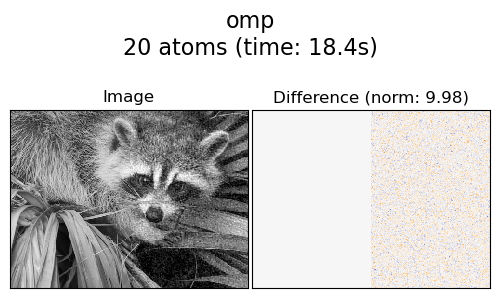

In [12]:
dm.raccoon_learner(dico7, V7, raccoon_face, distorted, 7, 20, 'omp')

### Patch Size = 14, Number of Atoms = 20

omp
20 atoms...


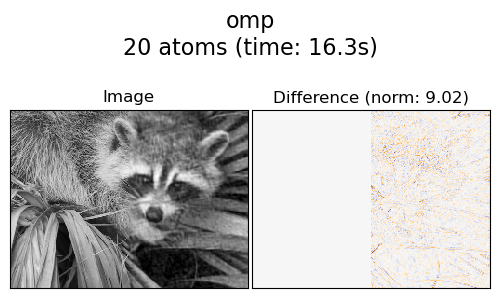

In [13]:
dm.raccoon_learner(dico14, V14, raccoon_face, distorted, 14, 20, 'omp')